$\color{green}{\text{This notebook is best viewed in jupyter notebook}}$

# Lab 4 (Weeks 10,11): Linear Regression

<div class="alert alert-block alert-info">
<b>Enter you credentials below</b>

- <b>Student Name:</b> Antonio Fernando Christophorus
- <b>Student ID:</b> 30311063
- <b>Date:</b> May 20, 2022
</div>

## Linear Regression

_Linear regression_, as the name implies, finds the _best fit line_ (in high-dimensional spaces, plane/hyperplane) between the _independent_ and _dependent_ variable (i.e., input data and target output). Recall that we approach the univariate linear regression in the class first and build up our way to multi-variate input/output forms. Univariate linear regression describes the situation where only one independent variable is presented (i.e., $x \in \mathbb{R}$) and the model has to find the linear relationship of it with the dependent variable (i.e., $y$). In the multivariate form, we have more than one independent variable (i.e., $\boldsymbol{x} \in \mathbb{R}^n$) and the model may have multiple outputs to predict (i.e., $\boldsymbol{y} \in \mathbb{R}^p$). <br> 
If you want to have a quick wrap-up, check the following Wikipedia article:
[Linear Regression](https://en.wikipedia.org/wiki/Linear_regression)

<!-- <p float="left">
    <img src="img/linear_regression_s.png" alt="LR_s" width="49%"/>
    <img src="img/linear_regression_m.png" alt="LR_m" width="49%"/> 
</p> -->
<p float="center">
    <img src="img/linear_regression_both.png" alt="LR_s" width="100%"/>
    <br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;  <em>Simple Linear Regression</em>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;  <em>Multiple Linear Regression</em>
</p>

As shown in the figure, linear regression can be understood as finding the _best-fitting straight line_ (or _plane_ in multidimensional cases) through the training examples. This best-fitting line is also called the **regression line**, and the vertical lines from the regression line to the training examples are the so-called **offsets** or **residuals** — the errors of our prediction.


## What you are going to do in this lab exercise!

In this laboratory exercise, you will create a program to find the linear relationship between the dependent and independent variable(s). <br> In all of the tasks below, you **may not** use any pre-written libraries for linear regression functions (e.g. <span style="color:red"> no </span> scikit-learn), instead you should use your knowledge of python and numpy to build your own code. 

<div class="alert alert-block alert-warning">
    
- **Tasks 1 & 2** :  Perform **linear regression** on the Life Expectancy Dataset
- **Tasks 3 & 4** :  Perform **image completion** on human face dataset and compute PSNR
- **Challenge** (Optional & Avanced): Perform **image completion** using a local reconstruction window and share what you can achieve!
    
</div>

In [1]:
# As always, we first import several libraries that will be helpful to solve the tasks
import matplotlib.pyplot as plt
import numpy as np
import cv2
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

## Task 1: Simple Linear Regression
We begin with the univariate linear regression. Suppose that you are given statistical consultancy to investigate the factors (e.g., Alcohol, BMI, GDP) affecting life expectancy. We will seek to fit a univariate linear regression model, with _'Life expectancy'_ as the response $y$ and '_Alcohol, BMI,_ or _GDP_' as the input $x$.

The linear relationship between $x$ and $y$ can be written as:
\begin{equation}
    y \approx w[0] + w[1] x \tag{1}
\end{equation}


<div class="alert alert-block alert-info">
    
#### In this task, you will work on the following points:
 1. From the provided files, use Alcohol data as $x$ to predict life expectancy as $y$. Write your own **linearRegression\_cof()** function, which takes $\boldsymbol{X} \in \mathbb{R}^{m \times n}$ and $\boldsymbol{Y} \in \mathbb{R}^{m \times p}$ to compute the optimal parameter of the model coefficients $\boldsymbol{w} = \big(w[0],w[1]\big)^\top$. Here $m$ is the number of data samples we have, $n$ is the dimensionality of input $\boldsymbol{x}$ and $p$ is the dimensionality of target $\boldsymbol{y}$. <br>You may **not** use  pre-existing linear regression functions (e.g., the one from scikit-learn). <br>
    Recall that the solution of linear regression can be written as
\begin{align}
    {\boldsymbol{W}}^\ast = (X^{\top}X)^{-1}X^{\top}Y  \tag{2}
\end{align}
Recall $\boldsymbol{X}$ is a matrix where data points are stacked in its rows (each row is one data point). Similarly, $\boldsymbol{Y}$ is a matrix where its rows store the desired output of the model. Since we use only Alcohol as $x$, then $n=1$. Also, since we are only interested in predicting the life expectancy, $p=1$. <br>
    **Hint**: you need to include a bias term in your model (i.e., $w[0]$). As discussed in the class (see Section 2.2 in the lecture notes), you just need to augment your data by adding a column of ones to the matrix $\boldsymbol{X}$ (add it from the left so the first element of your weight vector shows the bias).

    
 2. Obtain and print the coefficients $w[0], w[1]$ for the _Alcohol_.
    

 3. Repeat the previous but this time consider _BMI_ as input $x$.  
     
  
 4. Write a function **predict()**, which takes a data point $\boldsymbol{x}_q$ and coefficients $\boldsymbol{w}$ and return the prediction $\hat{y} = \boldsymbol{w}^\top \boldsymbol{x}_q$. <br>
**Hint:** Again you need to be careful about how you use the bias term $w[0]$. One possible solution is always augment $\boldsymbol{x}_q$ with a constant feature 1 and then forming $\hat{y}_q = \boldsymbol{w}^\top \boldsymbol{x}_{q,\text{aug}}$, where we denoted the augmented  $\boldsymbol{x}_{q}$ by $\boldsymbol{x}_{q,\text{aug}}$. Needless to say, you need to put the constant feature 1 at the correct location (so if you augment from left, meaning you add a 1 as the very first element of each training $x$, then you need to do the same with $x_q$). 
        
        
 5. Use this predict() function to plot $y = $ 'Life expectancy'  against $x =$ 'Alcohol' and  $x =$ 'BMI' on your training data. You are asked to display both the original data as a scatter plot and your predicted best fit line.
    
    
 6. Judging by your visualisations of the data and the regression line, which feature do you think is more useful to predict the life expectancy? Why? 

**Loading the data**

In [2]:
# === Task1 ===
# Alcohol data: task1_alc.npy
# BMI data:     task1_bmi.npy
# GDP data:     task1_gdp.npy
# Life expectancy: task1_lifeexpt.npy

# Load data from drive
alcohol_data = np.load("data/task1_alc.npy")
bmi_data = np.load("data/task1_bmi.npy")
gdp_data = np.load("data/task1_gdp.npy")
life_expect_data = np.load("data/task1_lifeexpt.npy")
print(alcohol_data.shape)

(73, 1)


#### 1. Regression function

In [3]:
def linearRegression_cof(X, Y, bias_shape):
    temp = np.ones(bias_shape)
    X = np.append(temp, X, axis=1)
    X_transpose = np.transpose(X)
    temp = np.dot(X_transpose, Y)
    
    w = np.dot(X_transpose, X)
    w = np.linalg.inv(w)
    w = np.dot(w, temp)
    
    return w

#### 2. Obtaining regression coefficients for _Alcohol_

In [4]:
# Obtain coefficients
X = alcohol_data
Y = life_expect_data
alcohol_coeff = linearRegression_cof(X, Y, X.shape)
# Print coefficients:
print(alcohol_coeff)

[[63.13011473]
 [ 0.96682896]]


_Hint:_ If you wrote the function correctly, your answer for the _Alcohol_ data should be close to: $w_{0}=63.130, w_{1}=0.967$ 


#### 3. Obtaining regression coefficients for _BMI_

In [5]:
# Obtain coefficients
X = bmi_data
Y = life_expect_data
bmi_coeff = linearRegression_cof(X, Y, X.shape)
# Print coefficients:
print(bmi_coeff)

[[60.74884974]
 [ 0.19073734]]


_Hint:_ If you wrote the function correctly, your answer for the _BMI_ data should be close to: $w_{0}=60.749, w_{1}=0.191$ 

In [6]:
X = gdp_data
Y = life_expect_data
gdp_coeff = linearRegression_cof(X, Y, X.shape)
# Print coefficients:
print(gdp_coeff)

[[ 6.95284993e+01]
 [-8.80816587e-03]]


#### 4. & 5. Predicting the Life Expectancy

Write a function **predict()**, which takes a data point $\boldsymbol{x}_q$ and coefficients $\boldsymbol{w}$ and return the prediction $\hat{y} = \boldsymbol{w}^\top \boldsymbol{x}_q$.

In [7]:
def predict(X, w):
    y_predict = list()
    bias = w[0]
    weights = w[1]
    
    for i in range(len(X)):
        y_hat = bias + weights * X[i][0]
        y_predict.append(y_hat)
        
    return y_predict

Now, we will use this **predict()** function to plot Y = 'Life expectancy' against the predictor X = 'Alcohol' and 'BMI'. You are asked to display both the original data as a scatter plot and your predicted best fit line.

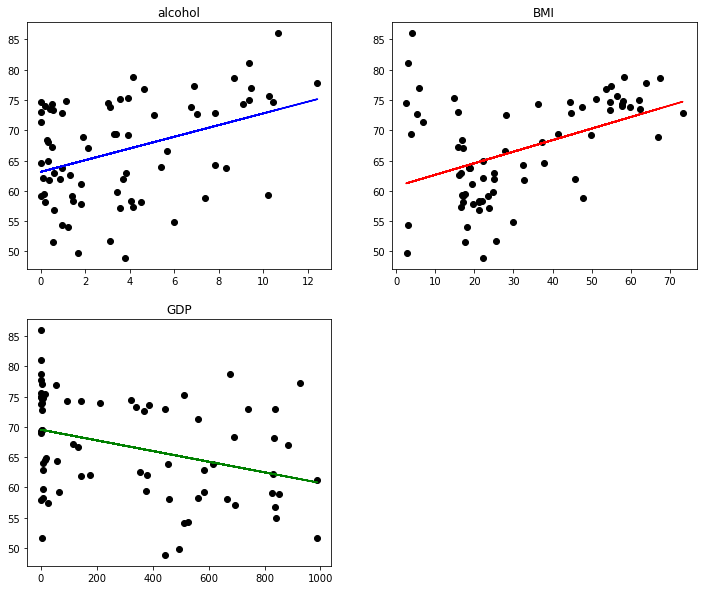

In [8]:
#Display the scatter results as well as the best-fit line  
# i.e. one (sub)plot for Alcohol, one (sub)plot for BMI
bmi_predictions = predict(bmi_data,bmi_coeff)
alcohol_predictions = predict(alcohol_data,alcohol_coeff)
gdp_predictions = predict(gdp_data, gdp_coeff)

fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

ax1.plot(alcohol_data, life_expect_data, 'o', c="black") # Original data
ax1.plot(alcohol_data, alcohol_predictions, c = "blue") # Best-fit line
ax1.title.set_text("alcohol")

ax2.plot(bmi_data, life_expect_data, 'o', c="black") # Original data
ax2.plot(bmi_data, bmi_predictions, c = "red") # Best-fit line
ax2.title.set_text("BMI")

ax3.plot(gdp_data, life_expect_data, 'o', c="black") # Original data
ax3.plot(gdp_data, gdp_predictions, c = "green") # Best-fit line
ax3.title.set_text("GDP")

#### 6. Data interpretation

<div class="alert alert-block alert-success"> 
 
#### Judging by your visualisations of the data and the regression line, can you explain what the results would mean if you had to use this model to make a prediction? Does the dependency seem reasonable to you, and why / why not? <br> What could the reason for this dependency in the data be?
    
In regression problems we want to predict a continuous variable, in this case we are trying to predict the life expectancy of a person based on alcohol consumption or their BMI. From the plots I am confident enough that our prediction would be quite accurate. This is because the regression or best-fit line divides the data equally. The dependency between them seems reasonable because life expectancy is based on a person's health condition which could be affected by their alcohol consumption and can be analyzed through their BMI. Therefore, they are dependent to each other.
    
</div>


## Task 2: Multiple Linear Regression

In this task, you will extend your program to fit a multivariate linear regression model. We again use the Linear Regression to fit a model but this time with three features $x[1]=$ BMI, $x[2]=$ Alcohol, and $x[3]$= GDP. That is, 

\begin{equation}
    y \approx w[0] + w[1] x[1] + w[2] x[2] + w[3] x[3] \tag{3}
\end{equation}


<div class="alert alert-block alert-info">
    
**In this task, you will work on the following points**:
    
 1. Extend your program to fit your regression model to the afore-described combination of _BMI_, _Alcohol_ and _GDP_ data loaded in Task 1. Print your results for the obtained regression coefficients $\boldsymbol{w}^\ast = \big(w[0], w[1], w[2], w[3]\big)^\top$

 2. Now, we are interested in evaluating the performance of our linear regression model. 
Up to now, we have fit a regression model on training data. Let’s see how good our model is when it comes to data that it hasn’t seen during training. Here we will test our linear model with data from Australia.<br>
For this, you will need to write a function **compute_sse()**, which computes the error as:
    
\begin{align}
    \boldsymbol{L}_\text{SSE} =\sum_{q} \big\|y_{q} - \boldsymbol{w}^\top \boldsymbol{x}_{q} \big\|^2\;. \tag{4}
\end{align}
 
 3. Evaluating the predictions on unseen test data from year=2002, country=Australia, measure and discuss the following:
    
    a) What is $\boldsymbol{L}_\text{SSE}$ if we only use $X$=BMI to train our model?
        
    b) What is $\boldsymbol{L}_\text{SSE}$ if we only use $X$=BMI,  $X_2$=Alcohol, and $X_3$=GDP to train our model?

    c) Thinking back to Task 1: If you could only choose **one** feature, either $X$=BMI **or** $X$=Alcohol, which one would you choose to make a prediction? Explain your reasoning.
    
    d) If you wanted to predict  GDP from $X$=BMI, and  $X_2$=Alcohol, what would you do? 
</div>

#### 1. Obtaining coefficients for multiple linear regression (on training data from Task 1)

In [9]:
# Obtain coefficients
alcohol_data = np.load("data/task1_alc.npy")
bmi_data = np.load("data/task1_bmi.npy")
gdp_data = np.load("data/task1_gdp.npy")
life_expect_data = np.load("data/task1_lifeexpt.npy")
X = np.append(bmi_data, alcohol_data, axis=1)
X = np.append(X, gdp_data, axis=1)
Y = life_expect_data
w0, w1, w2, w3 = linearRegression_cof(X, Y, alcohol_data.shape)
w = linearRegression_cof(X, Y, alcohol_data.shape) # For task 2

In [10]:
# Print coefficients:
print(w0)
print(w1)
print(w2)
print(w3)

[61.07529735]
[0.15446318]
[0.6899124]
[-0.00529543]


_Hint:_ If you wrote the function correctly, your results should be close to: $w_{0}=61.075, w_{1}=0.154, w_{2}=0.690, w_{3}=-0.005$ 

#### 2. Computing the Error to evaluate the performance of the linear regression models

In [11]:
#Compute the sum squared error
def compute_sse(y_estimate, y):
    error = np.sum((y-y_estimate)**2)
    return error 

#### 3. Evaluating on unseen test data

In [12]:
# Load the test data for this task: Australia, year 2002
# Test BMI data:     task2_AU2002_test_bmi.npy
# Test Alcohol data: task2_AU2002_test_alc.npy
# Test GDP data:     task2_AU2002_test_gdp.npy
# Test Life expect.: task2_AU2002_test_lifeexpt.npy

# Important: Be careful NOT to confuse your training and test data! 
# Training data is for fitting the model, test data for evaluation only!

# Load the test data from drive
alcohol_test = np.load("data/task2_AU2002_test_alc.npy")
alcohol_test = np.reshape(alcohol_test, (1,1))
bmi_test = np.load("data/task2_AU2002_test_bmi.npy")
bmi_test = np.reshape(bmi_test, (1,1))
gdp_test = np.load("data/task2_AU2002_test_gdp.npy")
gdp_test = np.reshape(gdp_test, (1,1))
life_expect_test = np.load("data/task2_AU2002_test_lifeexpt.npy")
life_expect_test = np.reshape(life_expect_test, (1,1))

##### a) $L_{\text{SE}}$ when trained on $X=$ 'BMI'  (Coeficients from Task 1)

In [13]:
# Compute L_SE
bmi_predictions = predict(bmi_test, bmi_coeff)
L_SE = compute_sse(bmi_predictions, life_expect_test)

# Print L_SE
print(L_SE)


60.57827691443129


##### b) $L_{\text{SE}}$ when trained on $X_1=$ 'BMI', $X_2=$ 'Alcohol' and $X_3=$ 'GDP'    (Coeficients from Task 1)

In [14]:
# # Compute L_SE
X = np.append(bmi_test, alcohol_test, axis=1)
X = np.append(X, gdp_test, axis=1)
predictions = predict(X, w)
L_SE = compute_sse(predictions, life_expect_test)
# Print L_SE
print(L_SE)


92.51933437636114


##### c) Question

<div class="alert alert-block alert-success"> 
 
#### Thinking back to Task 1: If you could only choose **one** feature, either $X$=BMI **or** $X$=Alcohol, which one would you choose to make a prediction? Why? Explain your reasoning!
    
I would choose to use the BMI because it gaves us the least amount of loss out of the 3 features tested. This means that our predicted data points does not diverge too much from our actual data points. This also helps us in increasing the speed at running the algorithm since we will need less number of iteration to get a high accuracy and less errors. 
    
</div>



##### d) Question

<div class="alert alert-block alert-success"> 
 
#### If you wanted to predict 'GDP' from $X_1=$ 'BMI' and $X_2=$ 'Alcohol', what would you do?
    
In this case I would make the GDP as my Y variable and the BMI or the Alcohol as the predictor. The algorithm being used will be the same but in this case I will see the relationship between (BMI or Alcohol) and GDP.
    
</div>

    
## Task 3: Image restoration of human face pictures
In the following tasks, you will now use your knowledge of linear regression together with the functions you implemented in the previous tasks to 'complete' or 'restore' images that have been corrupted. 

We will work with a subset of the well-known [LFW dataset](http://vis-www.cs.umass.edu/lfw/) that comprises a selection of images depicting the faces of various celebritries. Our selected data set consists of a total number of 273 images, each with height 62px and width 47px. This data is split into 185 training and 88 test images.

<div class="alert alert-block alert-info">
    
#### In this task, you will work on the following four points:
 1. Load _'train_face_crpt.npy'_ & _'train_face_clean.npy'_ as your training data set, and _'test_face_crpt.npy'_ & _'test_face_clean.npy'_ as your test data set. Display an example image from the corrupted training set (_'train_face_crpt.npy'_) and the corrupted test set (_'test_face_crpt.npy'_) side-by-side to check the correct data import and to see what you're going to work with. <br> 
    Depending on your knowledge of celebreties, you might notice that it is quite hard to identify the person on the image, since 50% of the pixels have been corrupted! So let's reconstruct the missing data to find out who it is!
 
 2. Write a Linear Regression function _'regression_fit()'_ to fit a model using the data of the training set. Your function should take the corrupted and the uncorrupted images of your training set as arguments (so you try to predict the clean image from the corrupted one.) <br>
    Note that you should re-use your previously developed _'linearRegression\_cof()'_ function from Task 1. You may **not** use pre-implemented functions from external libraries that perform linear regression! (Mathematical operations from numpy are allowed)
 
 3. To check how well your model works on unseen data, you will now use the optimised regression model to predict the missing pixels of the faces from the unseen test set (i.e., perform 'image completion'). Your _'predict()'_ function will take in the corrupted samples and regression coefficients and return the restored ones. <br>
    For the 9th image of the test set (i.e., image[8]), display the uncorrupted version, the corrupted version and your reconstructed one side-by-side to compare!
 
 4.  Repeat step 3 for the training images, i.e., perform image completion, and display the results for the 6th image of the training set (i.e., image[5]).

</div>

#### 1. Loading and displaying data

In [15]:
# === Task3 ===
# Training set: Original images:    train_face_clean.npy
# Training set: Corrupted images:   train_face_crpt.npy
# Test set: Original images:        test_face_clean.npy
# Test set: Corrupted images:       test_face_crpt.npy

# Load data from drive
# alcohol_test = np.load("data/task2_AU2002_test_alc.npy")
# alcohol_test = np.reshape(alcohol_test, (1,1))
train_clean_data = np.load("data/train_face_clean.npy")
train_corrupt_data = np.load("data/train_face_crpt.npy")
test_clean_data = np.load("data/test_face_clean.npy")
test_corrupt_data = np.load("data/test_face_crpt.npy")

# Lets see what the corrupted training data looks like
# --> Visualise image[5] of the corrupted train and image[8] of the corrupted test set (feel free to check others as well)




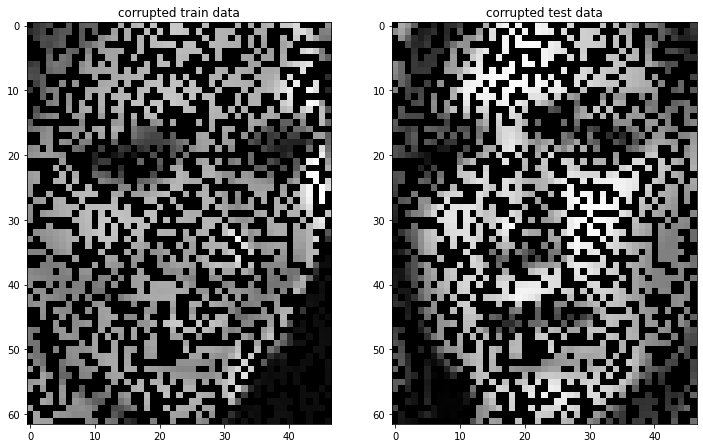

In [16]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.imshow(train_corrupt_data[5], cmap='gray')
ax1.title.set_text('corrupted train data')
ax2.imshow(test_corrupt_data[8], cmap='gray')
ax2.title.set_text('corrupted test data')

#### 2. Fitting the regression model / Determining the parameters

In [17]:
# Implement regression_fit() 
def regression_fit(samples_X, samples_Y):
    # input arguments: 
    #    samples_X: training samples
    #    samples_Y: training 'labels' (uncorrupted/clean samples)
    # output:
    #    reg_cof: regression coefficients (parameters)
    
    temp = np.linalg.pinv(samples_X)
    reg_cof = np.dot(temp, samples_Y)
    
    return reg_cof

In [18]:
# Retrieve the regression parameters
X = np.reshape(train_corrupt_data,(train_corrupt_data.shape[0],train_corrupt_data.shape[1]*train_corrupt_data.shape[2]))
Y = np.reshape(train_clean_data,(train_clean_data.shape[0],train_clean_data.shape[1]*train_clean_data.shape[2]))
w_img = regression_fit(X,Y)



#### 3. Completing the corrupted images of the unseen test data by using linear regression to predict the missing pixels

In [19]:
# Predict the missing pixels for all test images
def predict_pixels(X, reg_cof):
    # input arguments: 
    #    samples: np.array with image data, shape (N, h, w)
    #    reg_cof: regression coefficients / parameters
    # output:
    #    rest_samples: restored samples -- np.array with image data, shape (N, h, w)
    X_temp = np.reshape(X,(X.shape[0],X.shape[1]*X.shape[2]))
    rest_samples = np.dot(X_temp,reg_cof)
    rest_samples = np.reshape(rest_samples,X.shape)
    
    return rest_samples

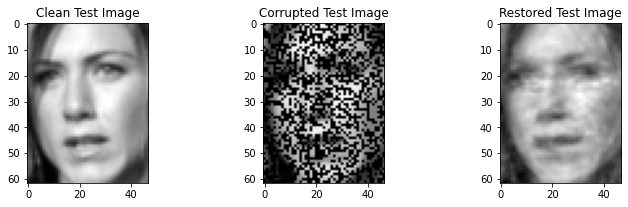

In [20]:
# Predict / Restore images of the test set
restored_test_img = predict_pixels(test_corrupt_data, w_img) 
# Display the reconstructed versions of the previously chosen corrupted test image alongside the original and corrupted one
# (Side-by-side plot of all three images: 'Clean test img', 'Corrupted test img', 'Restored test img')

restored_test_img = np.array(restored_test_img)
restored_test_img = restored_test_img.reshape(test_corrupt_data.shape)

fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax1.imshow(test_clean_data[8], cmap='gray')
ax1.title.set_text('Clean Test Image')
ax2.imshow(test_corrupt_data[8], cmap='gray')
ax2.title.set_text('Corrupted Test Image')
ax3.imshow(restored_test_img[8], cmap='gray')
ax3.title.set_text('Restored Test Image')


#### 4. Completing the corrupted training images via linear regression

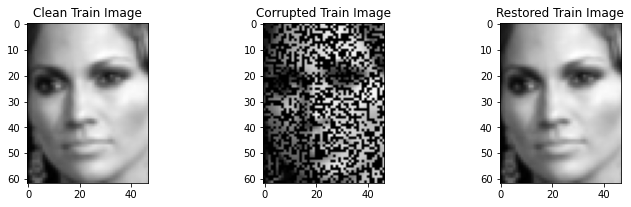

In [21]:
# Predict / Restore images of the training set
restored_train_img = predict_pixels(train_corrupt_data, w_img) 


# Display the reconstructed versions of the previously chosen corrupted test image alongside the original and corrupted one
# (Side-by-side plot of all three images: 'Clean train img', 'Corrupted train img', 'Restored train img')
restored_train_img = np.array(restored_train_img)
restored_train_img = restored_train_img.reshape(train_corrupt_data.shape)

fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax1.imshow(train_clean_data[12], cmap='gray')
ax1.title.set_text('Clean Train Image')
ax2.imshow(train_corrupt_data[12], cmap='gray')
ax2.title.set_text('Corrupted Train Image')
ax3.imshow(restored_train_img[12], cmap='gray')
ax3.title.set_text('Restored Train Image')


<div class="alert alert-block alert-success"> 
 
#### What do you observe if you compare the image quality of the restored test image to the restored training image? Why does our regression model perform differently for these two sets?
    
Based on the results that I got, the model works better with the train image. This is due to the weights that are trained based on the train image. When the model was used on a test image, its does not work well since the model never seen the image before. The weights also predict the pixel intensity at that specific pixel location based on the train image that might be completely different with the test image. Regression model are not the best choice to do image restoration since it can only predict trends and dependency between 2 or more variables, while in this case we try to predict how the clean version of the corrupted image would look like and regression is usually use in predicting simple dependency trends such as stocks and foreign exchange rates.
    
    
</div>

## Task 4: Peak Signal-to-Noise Ratio PSNR

The _Peak Signal to Noise Ration_ (PSNR) is defined as the ratio of the maximum possible power of a signal to the power of corrupting noise that affects representation fidelity. PSNR is most easily defined via the mean squared error (MSE). Given a noise-free $m\times n$ grayscale image $I$ and its noisy approximation $K$, the $\mathrm{MSE}$ and $\mathrm{PSNR}$ are defined as

\begin{align}
    \mathrm{MSE} &= \frac{1}{mn} \sum^{m-1}_{i=0} \sum^{n-1}_{j=0} [I(i,j)-K(i,j)]^{2} \\
    \mathrm{PSNR} &= 20 \cdot log_{10}(\mathrm{MAX}_I))-10 \cdot log_{10}(\mathrm{MSE}).
\end{align}

Note that $\mathrm{MAX}_I$ denotes the maximum possible value a pixel can have.

[Reference](https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio)



<div class="alert alert-block alert-info">
    
#### In this task, you will conentrate on the following points:
    
 1. Implement a function _'PSNR()'_ that takes in two images to measure the Peak Signal to Noise Ratio between them. In our case, we want to measure the PSNR between a reconstructed image and its original uncorrupted version. _Hint_: Make sure to convert the image intensities to integer values ([0,255]) for this computation.
 
 2. We are again considering the 9th image of the test set from Task 3 (i.e., image[8]). Use your implemented function to measure the PSNR of your restored version of this test image. Additionally compute the PSNR of the corrupted version of this image (the 'raw corrupted' test data). 
    
 3. Now, load the additionally provided data samples _'train_face_crpt_rdm.npy'_ and _'test_face_crpt_rdm.npy'_, and visualise the 6th image of this new train set (i.e., image[5]) and the 9th image of this new test set (i.e., image[8]). If you compare these two images to the ones loaded in Task 3, you will notice that this new data is almost identical to the previously used data, but is **corrupted with a random pattern for each image**, whereas the **previously** used images were all **corrupted by the exact same pattern**. (You can check by inspecting the train and test images you displayed in Task 3). 
    
 4. Repeat the regression fitting, prediction and visualisation from Task 3 on these new data samples. <br>
  
 5. Now again, use your implemented function to measure the PSNR of your restored version of the 9th test image (i.e., image[8]) and additionally compute the PSNR of the 'randomly' corrupted version of this image (the new 'raw corrupted' test data).  <br>

 6. Compare your PSNR and visual results from step 5 with the ones from step 2! Can you explain what might have changed that led to differences between the restored images?
</div>

#### 1. PSNR Implementation

In [22]:
# Implement PSNR to measure quantitative difference
def PSNR(img1, img2):
    error = np.sum(np.sum((img2-img1)**2))
    error = error/(img1.shape[0]*img2.shape[1])
    max_value = 255
    psnr = 20 * np.log10(255) - 10 * np.log10(error)
    return psnr

#### 2. Calculate the PSNR for the 9th test image (i.e., image[8]) from Task 3: corrupted image and restored version

In [23]:
# Compute and print the PSNR values for the 9th test image: Both for corrupted 'raw' version and restored version

raw_PSNR = PSNR(test_clean_data[8], test_corrupt_data[8])
restored_PSNR = PSNR(test_clean_data[8], restored_test_img[8])
print(raw_PSNR)
print(restored_PSNR)

8.500059707416668
25.45142421594407


#### 3. Load new data corrupted with random patterns
If you closely inspect the corrupted data and compare it to the one from the previous task, you will notice that apart from the obvious uncorrupted 'frame' we added, the corruption pattern now differs from image to image!

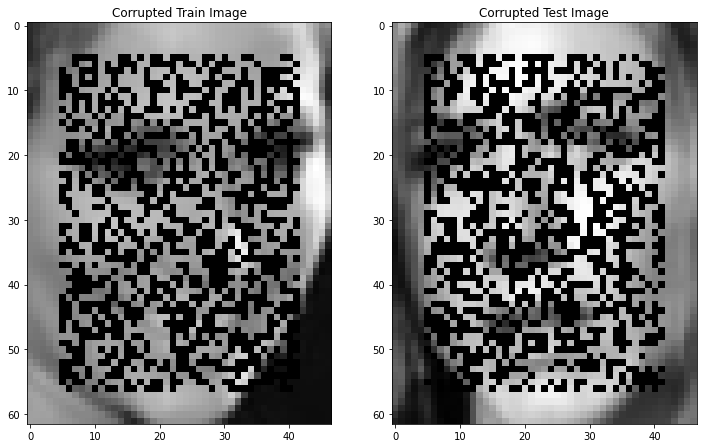

In [24]:
# Load data from drive
# Train images corrupted with random pattern: train_face_crpt_rdm.npy
# Test  images corrupted with random pattern: test_face_crpt_rdm.npy
train_data = np.load("data/train_face_crpt_rdm.npy")
test_data = np.load("data/test_face_crpt_rdm.npy")

# Lets see what the corrupted training data looks like
# --> Visualise image[5] of the corrupted train and image[8] of the corrupted test set (but feel free to check others as well)
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.imshow(train_data[5], cmap='gray')
ax1.title.set_text('Corrupted Train Image')
ax2.imshow(test_data[8], cmap='gray')
ax2.title.set_text('Corrupted Test Image')

train_data_new = np.reshape(train_data,(train_data.shape[0],train_data.shape[1]*train_data.shape[2]))
test_data_new =  np.reshape(test_data,(test_data.shape[0],test_data.shape[1]*test_data.shape[2]))



#### 4. Repeat regression fit and prediction on new data

In [25]:
# Retrieve the regression coefficients to reconstruct images from corrupted ones
train_clean_data = np.load("data/train_face_clean.npy")
test_clean_data = np.load("data/test_face_clean.npy")

Y = np.reshape(train_clean_data, (train_clean_data.shape[0],train_clean_data.shape[1]*train_clean_data.shape[2]))
w_img = regression_fit(train_data_new, Y)
print(test_data.shape)

(88, 62, 47)


In [26]:
# Restore all corrupted test images
restored_img = predict_pixels(test_data, w_img)
print(restored_img.shape)


(88, 62, 47)


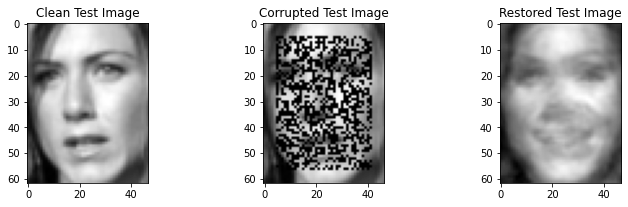

In [27]:
# Display the results on the randomly corrupted test image[8]: Compare 'clean', 'corrupted' and 'restored'
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax1.imshow(test_clean_data[8], cmap='gray')
ax1.title.set_text('Clean Test Image')
ax2.imshow(test_data[8], cmap='gray')
ax2.title.set_text('Corrupted Test Image')
ax3.imshow(restored_img[8], cmap='gray')
ax3.title.set_text('Restored Test Image')


#### 5. Calculate the PSNR for the 9th test image (i.e., image[8]): corrupted image and restored version

In [28]:
# Compute and print the PSNR values for the 9th test image (random corruption pattern): 
# Both for corrupted 'raw' version and restored version

raw_PSNR = PSNR(test_clean_data[8], test_corrupt_data[8])
restored_PSNR = PSNR(test_clean_data[8], restored_test_img[8])


Final_PSNR = PSNR(test_data[8], restored_img[8])
print(Final_PSNR)

9.635021997937166


##### 6. Question

<div class="alert alert-block alert-success">
    
#### Compare your PSNR and visual results from step 5 with the ones from step 2! Can you explain what might have changed that led to differences between the restored images?
<br>  
The PSNR in step 5 is higher and the visual results is also better in step 5. The image from step 5 is more clear although it is not completely clean, we can recognise that it is a human face. The PSNR is better in step 5 because it is not as corrupted as the one we had in step 2. The difference in PSNR between the restored images is caused by the position where the corruption happens in the image. In step 2, the whole image was corrupted while in step 5 only the main feature of the face is corrupted not the background or the hair. 

</div>



<div class="alert alert-block alert-warning">
    
# <center> That is all for the marked part of this Lab! 
# <center> **IF YOU DARE, try the challenge and share your results on slack!**
     
</div>

# CHALLENGE: Reconstruction from local neighbourhood
We realised in the previous task that random corruption patterns for each image prove difficult for naive linear regression model. In this task, we want to explore the possibility to reconstruct a corrupted pixel only from its local neighbourhood. In more detail, we will predict the value of a corrupted pixel by using a window of size $5\times 11$ directly above the pixel. (This is also the reason why our 'new' corrupted images have an uncorrupted 'frame' of 5 pixels.)

<div class="alert alert-block alert-info">
    
#### In this task, you will concentrate on the following points:
    
 1. Write a function _'extract_patch()'_ to extract patches of a specific patch size directly above a specified pixel.
    
 2. Use your patch extraction function to create a new training data set as follows: a) For each corrupted pixel in the training images, extract a patch from the respective uncorrupted training image directly above the pixel. b) Additionally store the 'correct' ground-truth value of the corrupted pixel.
    
 3. Using this new data set, determine the regression parameters by fitting your linear regression model (Re-use the function implemented in Task 3).
    
 4. Choose one image form the unseen randomly corrupted test dataset and predict the missing pixels of this image using your new regression model. 

 5. Visualise your new and previous results side-by-side: Original Image, Image Corrupted with Random pattern, Image reconstructed with 'naive' linear regression model (Task 3), Image reconstructed with 'local' regression model (this task).

Note that while the linear regression model in task 3 was used to predict the entire image, we are only predicting one image intensity at a time in this task (i.e. a scalar value)! <br>
    
**Hint**: Your reconstruction should start at the top left of the image, since the local window (or patch) above will be uncorrupted and can thus be used for the prediction. Store all your reconstructed image intensities directly in the image, so that you can use the reconstructed values of the first row to predict the intensities of the 2nd row, and so on. <br>
<br><br>
**Optional**: After finishing your reconstruction using the local window, you can: <br>

 6. Apply a mean filter over the reconstructed image by using _ndimage.uniform_filter()_ from the _scipy_ library
    
 7. Calculate the PSNR of the new reconstructed results and compare to the results you got in Task 4

</div>


In [29]:
# ===Task Local Neighbourhood===
# Data is already loaded, and we visualised already how it looks like!

# If no longer existing or overwritten, reload data from drive
# Train images corrupted with random pattern: train_face_crpt_rdm.npy
# Test  images corrupted with random pattern: test_face_crpt_rdm.npy

**Main idea** (concise): Parse the image and check for pixels whose value is exactly 0 (i.e. black corrupted pixel);  For each of these pixels, take the area right above in a 5x11 pixel region from the corresponding uncorrupted training image and add it to the samples list (like we did before with the entire images) -- the Y value is the corrsponding intensity of the actual pixel to be reconstructed (also to be extracted from the clean image).

#### 1. Patch extraction
Create a function to extract a patch of size 'patch_size' (for us (5,11)) above the current pixel, symmetric to the left and right. A $5\times 11$ patch should e.g. go 5 pixels above, 5 to the left and 5 to the right of the current pixel

In [30]:
def extract_patch(img, row, col, patch_size):
    return ...

#### 2. Extract training patches for corrupted pixels
Theoretically, we could extract a patch for each individual pixel of all images (that have a sufficiently big neighbourhood).
To reduce the use of data and speed up our computations, we will just use the first 10 images of the training set.
We will further only extract patches for pixels that are currently corrupted in these training images. Since the corruption pattern is random, this should cover a sufficient number of different pixels.

In [31]:
# For all images, go through each individual image (rows and cols) and find all corrupted pixels (value == 0)
# Extract the corresponding patches from the training image (uncorrupted, X) and the value-to-be-restored (Y)


In [32]:
# Print out some info, e.g. how many training patches you have extracted from the image
# --> these will be used to fit your new model


#### 3. Fitting the regression model to the information of the image patches

In [33]:
# Retrieve coefficients using our linear regression fit function from Task 3



#### 4. Prediction / Reconstruction for ONE image of your choice
Prediction function is slightly different, since we cannot just directly predict ALL y-values! To predict a y-value, we need to have access to the window of size 5x11 right above the pixel we want to reconstruct. Intuitively, this can only be done for the first row of corrupted pixels, but not further (since the windows for the 2nd row would include corrupted pixels of the first row)! --> To solve this problem, we will reconstruct the image pixel-by-pixel using the reconstructed results of row1 to reconstruct row 2, and so on.


In [34]:
# Let's restore one specific test image! A good start would be to again choose image[8] of the test set, 
#  so we can compare our results to the previously restored version 


#### 5. Visualisation of the results

In [35]:
# Visualise all approaches | Original test, corrupted raw test, restored one from Task 4, Newly restored one here!


<div class="alert alert-block alert-success">
    
#### Compare the results you achieve with this local approach. What do you observe when you look at the reconstruction quality in the top half vs. the one in the lower half? Why is this the case?
<br><br>

    
Write your answer here

</div>


#### (Optional): Further image quality improvement via averaging

In [36]:
# Use some scipy image filtering magic to further improve the results!
from scipy import ndimage
...

Ellipsis

In [37]:
# Visualise all approaches again and compare


#### (Optional): Check PSNR of new approaches vs. previous ones

In [38]:
# Compute the PSNR of the new reconstructions and compare to previous ones -- This will give you some quantitative measure

<div class="alert alert-block alert-warning">
    
# <center> That is all for this Lab and the Challenge! Congrats!
    
</div>